In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
# here we can see null values are not in data

In [11]:
cat=(df.dtypes=='object')
print("cat_col:", len(list(cat[cat].index)))

cat_col: 9


In [13]:
cat_col= df.select_dtypes(include=['object']).columns
print("categorical data", cat_col)

categorical data Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [14]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [15]:
print(df['Attrition'].value_counts())

No     1233
Yes     237
Name: Attrition, dtype: int64


In [16]:
df=df.replace({"Attrition": {"No":0, "Yes":1}})

In [17]:
print(df['BusinessTravel'].value_counts())

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


In [18]:
df=df.replace({"BusinessTravel": {"Non-Travel":1, "Travel_Frequently":2, "Travel_Rarely":3}})

In [19]:
print(df['Department'].value_counts())

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


In [20]:
df=df.replace({"Department": {"Human Resources":1, "Research & Development":2,"Sales":3 }})

In [21]:
print(df['EducationField'].value_counts())

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


In [45]:
df=df.replace({"Department": {"Human Resources":1, "Life Sciences":2, "Marketing":3,
                             "Medical":4, "Other":5, "Technical Degree":6}})

In [23]:
print(df['Gender'].value_counts())

Male      882
Female    588
Name: Gender, dtype: int64


In [24]:
df=df.replace({"Gender": {"Male":1, "Female":0}})

In [25]:
print(df['JobRole'].value_counts())

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


In [26]:
df=df.replace({"Department": {"Sales Executive ":1, "Research Scientist":2, "Laboratory Technician":3,
                             "Manufacturing Director":4, "Healthcare Representative":5, "Manager":6,
                             "Sales Representative":7, "Research Director":8, "Human Resources":9}})

In [27]:
print(df['MaritalStatus'].value_counts())

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


In [28]:
df=df.replace({"MaritalStatus": {"Married":1, "Single":2,"Divorced":3}})

In [29]:
print(df['OverTime'].value_counts())

No     1054
Yes     416
Name: OverTime, dtype: int64


In [30]:
df=df.replace({"OverTime": {"No":0, "Yes":1}})

In [31]:
print(df['Over18'].value_counts())

Y    1470
Name: Over18, dtype: int64


In [32]:
df=df.replace({"Over18": {"Y":1}})

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int64 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [34]:
df.head

<bound method NDFrame.head of       Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               3       1102           2                 1   
1      49          0               2        279           3                 8   
2      37          1               3       1373           3                 2   
3      33          0               2       1392           3                 3   
4      27          0               3        591           3                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               2        884           3                23   
1466   39          0               3        613           3                 6   
1467   27          0               3        155           3                 4   
1468   49          0               2       1023           2                 2   
1469   34          0               3        628           3                 8  

In [36]:
df.drop(columns=['StandardHours','EmployeeCount','Over18'], axis=1, inplace=True)

In [37]:
# same value data columsn are dropped

In [38]:
df.shape[1]

32

In [46]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,2.607483,802.485714,2.610884,9.192517,2.912925,1024.865306,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.568893,8.106864,1.024165,602.024335,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,1.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,465.000000,2.000000,2.000000,2.000000,491.250000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,3.000000,802.000000,3.000000,7.000000,3.000000,1020.500000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,3.000000,1157.000000,3.000000,14.000000,4.000000,1555.750000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,3.000000,1499.000000,3.000000,29.000000,5.000000,2068.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [47]:
# as per above query seems alot of outlier is there

In [49]:
df.head

<bound method NDFrame.head of       Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               3       1102           2                 1   
1      49          0               2        279           3                 8   
2      37          1               3       1373           3                 2   
3      33          0               2       1392           3                 3   
4      27          0               3        591           3                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               2        884           3                23   
1466   39          0               3        613           3                 6   
1467   27          0               3        155           3                 4   
1468   49          0               2       1023           2                 2   
1469   34          0               3        628           3                 8  

In [50]:
print(df['EducationField'].value_counts())

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


In [54]:
df=df.replace({"EducationField": {"Human Resources":1,"Life Sciences":2,"Marketing":3,
                             "Medical":4,"Other":5,"Technical Degree":6}})

In [62]:
print(df['JobRole'].value_counts())

1    326
2    292
3    259
4    145
5    131
6    102
7     83
8     80
9     52
Name: JobRole, dtype: int64


In [61]:
df=df.replace({"JobRole": {"Sales Executive":1, "Research Scientist":2, "Laboratory Technician":3,
                             "Manufacturing Director":4, "Healthcare Representative":5, "Manager":6,
                             "Sales Representative":7, "Research Director":8, "Human Resources":9}})

In [63]:
df.head

<bound method NDFrame.head of       Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               3       1102           2                 1   
1      49          0               2        279           3                 8   
2      37          1               3       1373           3                 2   
3      33          0               2       1392           3                 3   
4      27          0               3        591           3                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               2        884           3                23   
1466   39          0               3        613           3                 6   
1467   27          0               3        155           3                 4   
1468   49          0               2       1023           2                 2   
1469   34          0               3        628           3                 8  

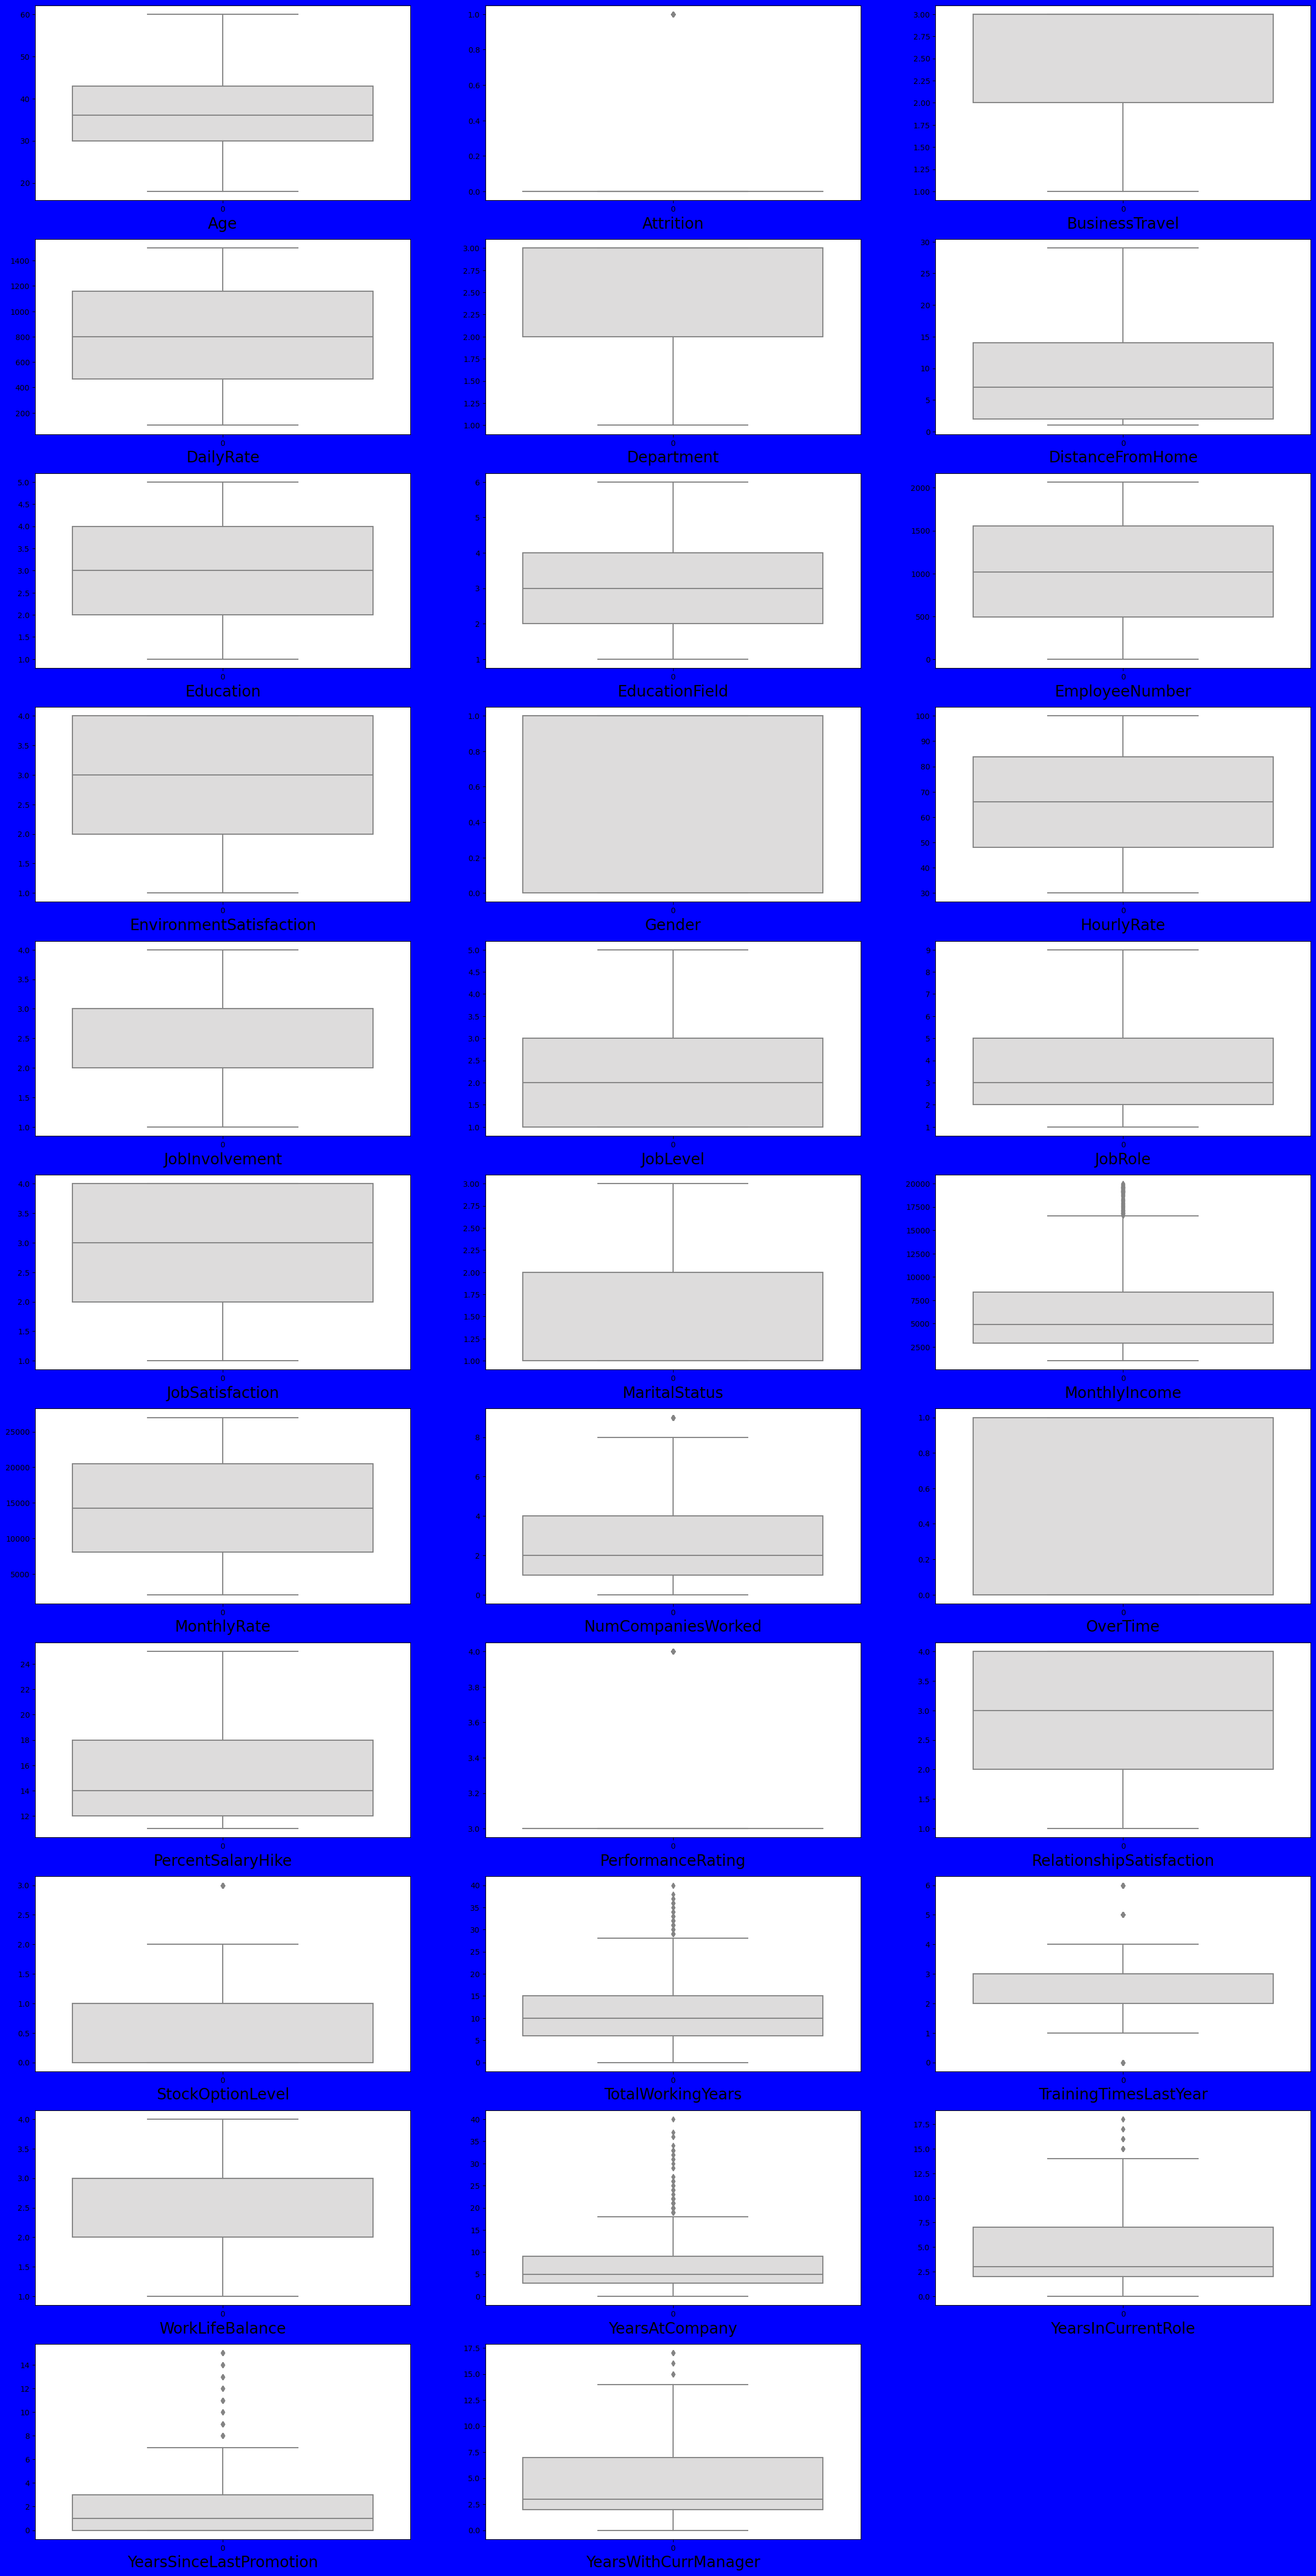

In [64]:
plt.figure(figsize=(30,60), facecolor="Blue")
index=1
for column in df:
    if index <=32:
        ax=plt.subplot(11,3, index)
        sns.boxplot(df[column], palette='coolwarm')
        plt.xlabel(column, fontsize=20)
    index+=1
plt.show()


In [65]:
# if we check above plot we get total 11 columns have outliers

In [66]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# we are using zscore method for remvoing outlier

In [67]:
from scipy.stats import zscore

In [68]:
outlier=['Attrition','MonthlyIncome','NumCompaniesWorked','PerformanceRating','PerformanceRating','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

z_score=df[outlier].apply(zscore)

threshold=3

df1=df[(z_score.abs()< threshold).all(axis=1)]


In [69]:
df.shape

(1470, 32)

In [71]:
# it means 0% loss of data, now we need check skewness

In [72]:
skewed_column=df.skew()
skewed_column

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                 -1.141828
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                     0.770149
JobSatisfaction            -0.329672
MaritalStatus               0.443615
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
W

In [73]:
# range of skewness is -0.5 to 0.5 (Attrition,BusinessTravel,DistanceFromHome,JobLevelJobLevel,MonthlyIncome,NumCompaniesWorked,
# overTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,StockOptionLevel,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,
# YearsSinceLastPromotion,YearsWithCurrManager) these all are right skew column

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
vif=pd.DataFrame()
vif['VIF']= [variance_inflation_factor (df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,33.657636,Age
1,1.462823,Attrition
2,15.516335,BusinessTravel
3,4.988180,DailyRate
4,21.564264,Department
5,2.343145,DistanceFromHome
6,9.467305,Education
7,7.125297,EducationField
8,3.924547,EmployeeNumber
9,7.274244,EnvironmentSatisfaction


In [78]:
# here we can see below columns are less corelation  with tgt variable , so that we can remove it
#(EmployeeNumber,Gender,OverTime,StockOptionLevel,YearsSinceLastPromotion)

In [81]:
X=df[['Age','BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField','EnvironmentSatisfaction','HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole','YearsWithCurrManager']]

In [82]:
y=df.Attrition
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [83]:
# Model building

In [84]:
from sklearn.model_selection import train_test_split
for i in range(0,200):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=i)

In [89]:
from sklearn.model_selection import cross_val_score


In [90]:
from sklearn.metrics import accuracy_score

In [91]:
from sklearn.linear_model import LogisticRegression

In [93]:
lgr=LogisticRegression()
lgr.fit(X_train,y_train)

pred=lgr.predict(X_test)

r= accuracy_score(y_test, pred)

print("LR test data :", r*100)



LR test data : 84.6938775510204


In [95]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
rf= RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)
print ("RF Classifier:",accuracy_score(y_test,y_pred_test)*100)

RF Classifier: 84.35374149659864


In [100]:
from sklearn.tree import DecisionTreeRegressor

In [101]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train, y_train)

pred2=dtr.predict(X_test)

r2=accuracy_score(y_test,pred2)

print("R-squared:", r2*100)

R-squared: 79.59183673469387


In [102]:
prediction_= pd.DataFrame({'Predicted values' :pred, ' actual values':y_test })
prediction_

,Predicted values,actual values
156,0,0
809,0,0
1083,0,1
771,0,0
404,0,0
...,...,...
1379,0,1
920,0,0
1082,0,0
1231,0,0


In [103]:
import joblib

model= LogisticRegression(fit_intercept=False, random_state=None, max_iter=10)
model.fit(X_train,y_train)

joblib.dump(model,'Attrition_model.joblib')

['Attrition_model.joblib']